# Reading in Dataset

In [ ]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("shubhambathwal/flight-price-prediction")

print("Path to dataset files:", path)

In [ ]:
# Load dataset
df = pd.read_csv(path + "/Clean_Dataset.csv")
df.head()

Encoding is the process of taking a categorical variable and making it "quantitative". Here are the two main types:

# Label encoding
Although the number of stops may seem like a quantity, it contains the level "two or more", meaning it is categorical. Economy/business class also isn't a quantity. We use label encoding to turn these features in quantitative variables, assigning a number to each unique "level". For class, note that it would have a linear effect on the price (we can expect business class to be consistently more expensive than economy).

In [ ]:
df["stops"].unique()

In [ ]:
df["class"].unique()

In [ ]:
# Label encoding
df["stops"] = df["stops"].map({"zero": 0, "one": 1, "two_or_more": 2})
df["class"] = df["class"].map({"Economy": 0, "Business": 1})
df.head()

# One-hot encoding
Imagine that we want to turn the "arrival time" variable from categorical to quantitative. Another method we can use to do this is one-hot encoding, where we make a new column for each unique level and fill each with a 0 or 1, depending on the original column's value.

In [ ]:
df['arrival_time'].unique()

In [ ]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=["arrival_time"], drop_first=True)
df_encoded.head()

We see that a column for "afternoon" is missing, but we can still infer a row's arrival time is afternoon if all other columns show "False". This is the purpose of the "drop_first" parameter.

# Binning

Imagine that we want to turn our "duration" variable, which is currently a quantitative variable, into a categorical variable. We can do this by creating ranges of values and sorting the values into these "bins".

In [ ]:
print(df["duration"].mean())
print(df["duration"].min())
print(df["duration"].max())

In this example, we classify duration from 0 to 3 hours as "short", from 3 to 7 hours as "medium", and 7 or above is classified as "long".

In [ ]:
# Binning
df["duration_binned"] = pd.cut(df["duration"], bins=[0, 3.0, 7.0, 50.0], labels=["short", "medium", "long"])
df

In [ ]:
# Generate counts of each level
df["duration_binned"].value_counts()

# Challenge Time!

We are challenging you to bin the variable "price" on your own, so that the counts of each level look like the picture below. Please do not change the cell that generates the counts. Please ask us if you need help!

In [ ]:
# Write your code here


In [ ]:
# DO NOT CHANGE THIS CELL - IT GENERATES YOUR VALUE COUNTS
df["price_binned"].value_counts()

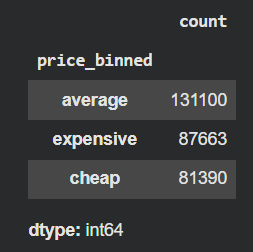

# Feature Splitting

Notice that our flight code entries follow a format where there are two characters followed by a dash and then three or four numbers. What if we wanted to split this feature in two parts: the part before the dash and the part after the dash? Then we could use feature splitting.

In [ ]:
# Feature Splitting
df["flight_code_part1"] = df["flight"].str.split("-").str[0]
df["flight_code_part2"] = df["flight"].str.split("-").str[1]
df.head()

In this situation, we lack context of what both parts mean, but if you had a variable with long addresses as entries, feature splitting could be very useful.

# Lag Features

Next week we will be focusing on time-series data, data where each row represents a specific date or time. In time-series, you can commonly see **lag features**, features that show the value from the previous date or even farther back, such as 7 days ago.

In [ ]:
# Create mock time-series data
dates = pd.date_range(start="2026-01-01", end="2026-01-06")
values = [1.5, 3.2, 4.1, 5.9, 7.8, 9.0]
mock_df = pd.DataFrame({"date": dates, "value": values})
mock_df

In [ ]:
# Generate lag columns
mock_df["lag_1"] = mock_df["value"].shift(1)
mock_df["lag_2"] = mock_df["value"].shift(2)
mock_df